In [1]:
# Technique: Create 'Avg_Grade' and 'Total_Approved'
# Justification: Semester-specific data (e.g., grades, approved units) lacks holistic insight; engineered features aggregate performance, improving dropout trend detection.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import os

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define paths and create directories
data_path = '/content/drive/My Drive/rawDataset.csv'
results_path = '/content/drive/My Drive/results/'
eda_vis_path = results_path + 'eda_visualizations/'
os.makedirs(eda_vis_path, exist_ok=True)

In [4]:
# Load dataset
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df = pd.read_csv(data_path, sep=';', names=columns, header=0)

In [5]:
# Feature Engineering: Creation of Aggregated Features
df['Avg_Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2
df['Total_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']

In [6]:
# Handle missing or invalid values (e.g., NaN or infinite values from division)
df['Avg_Grade'] = df['Avg_Grade'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['Total_Approved'] = df['Total_Approved'].fillna(0)

In [7]:
# Feature Engineering: Dimension Reduction using PCA on Curricular Units Features
# Select relevant features for PCA (focusing on curricular units to reduce dimensions)
curricular_features = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]

X = df[curricular_features]

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA to reduce to 2 components for visualization and efficiency
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Add PCA components back to dataframe
df['PCA_Component1'] = X_pca[:, 0]
df['PCA_Component2'] = X_pca[:, 1]

print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Components Sample:\n", df[['PCA_Component1', 'PCA_Component2']].head())


PCA Explained Variance Ratio: [0.51379728 0.16979443]
PCA Components Sample:
    PCA_Component1  PCA_Component2
0       -5.436567       -0.986890
1        0.085205        1.224100
2       -3.589884       -1.621948
3        0.325992        0.884045
4        0.064950        0.867917


In [12]:
# Save the processed dataset (for group pipeline integration)
processed_path = results_path + 'outputs/member5_processed_features.csv'
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)
print(f"Processed features saved to: {processed_path}")

Processed features saved to: /content/drive/My Drive/results/outputs/member5_processed_features.csv


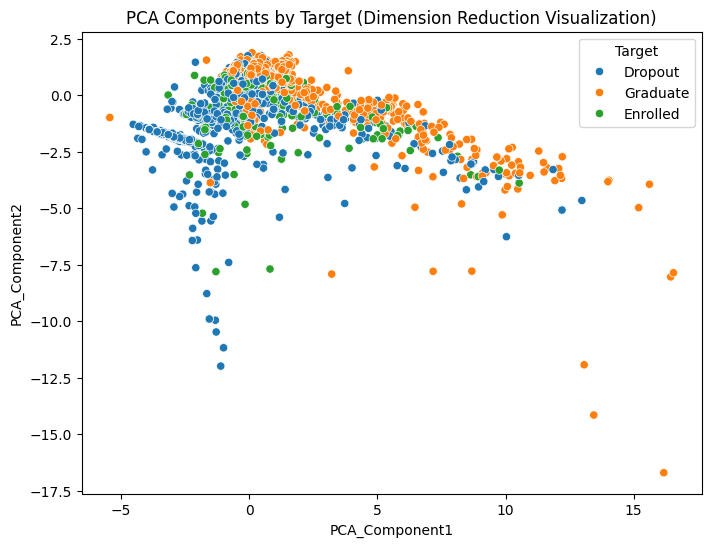

In [13]:
# EDA Visualization: Scatterplot of PCA Components colored by Target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_Component1', y='PCA_Component2', hue='Target', data=df)
plt.title("PCA Components by Target (Dimension Reduction Visualization)")
plt.savefig(eda_vis_path + 'member5_pca_scatterplot.png')
plt.show()

**Interpretation**

This PCA plot shows that while graduates and dropouts have some separation, their points still overlap a lot, and enrolled students are mostly scattered among them, meaning the groups are not clearly distinct.